IMPORTING PACKAGES

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.ensemble import RandomForestRegressor

LOADING DATA

In [74]:
raw_data = pd.read_csv('C:/Users/ronin/Google Drive/IAS ML MODEL/BIG DATA/big_dat.csv')
# print(raw_data.info())

In [75]:
raw_data.columns =['REF'] + [''] * (len(raw_data.columns)-1) #making REF column of refractive index which is our LABEL

raw_data.head()


,REF,,,,,,,,,,...,,,,,,,,,,
0,1.3008,0.005880,0.005925,0.005982,0.006050,0.006133,0.006233,0.006352,0.006493,0.006653,...,0.006480,0.006284,0.006100,0.005927,0.005764,0.005609,0.005461,0.005321,0.005187,0.005059
1,1.3012,0.005875,0.005920,0.005975,0.006042,0.006124,0.006222,0.006340,0.006480,0.006640,...,0.006483,0.006287,0.006103,0.005930,0.005767,0.005611,0.005464,0.005324,0.005190,0.005062
2,1.3016,0.005870,0.005914,0.005968,0.006035,0.006115,0.006212,0.006328,0.006466,0.006627,...,0.006486,0.006290,0.006106,0.005933,0.005770,0.005614,0.005467,0.005327,0.005193,0.005065
3,1.3020,0.005865,0.005908,0.005962,0.006027,0.006106,0.006201,0.006316,0.006453,0.006613,...,0.006489,0.006293,0.006110,0.005936,0.005772,0.005617,0.005470,0.005329,0.005195,0.005067
4,1.3024,0.005860,0.005903,0.005955,0.006020,0.006097,0.006191,0.006304,0.006439,0.006598,...,0.006492,0.006297,0.006113,0.005939,0.005775,0.005620,0.005473,0.005332,0.005198,0.005070


PLOTTING A ROW

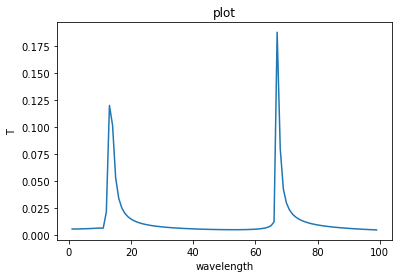

In [76]:
# r2 = raw_data.iloc[:,1:]
x = list(range(1, 100))
y = raw_data.iloc[1,1:]
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('wavelength')
# naming the y axis
plt.ylabel('T')
  
# giving a title to my graph
plt.title('plot')
  
# function to show the plot
plt.show()

In [77]:
y = raw_data['REF'] #Y is our label vector
raw_data.drop(['REF'], axis=1, inplace=True)
print(y)



0      1.3008
1      1.3012
2      1.3016
3      1.3020
4      1.3024
        ...  
494    1.4984
495    1.4988
496    1.4992
497    1.4996
498    1.5000
Name: REF, Length: 499, dtype: float64


In [78]:
raw_data.columns =list(range(1,100))  #adding column names as features
raw_data.columns
raw_data.head()

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,0.005880,0.005925,0.005982,0.006050,0.006133,0.006233,0.006352,0.006493,0.006653,0.006793,...,0.006480,0.006284,0.006100,0.005927,0.005764,0.005609,0.005461,0.005321,0.005187,0.005059
1,0.005875,0.005920,0.005975,0.006042,0.006124,0.006222,0.006340,0.006480,0.006640,0.006794,...,0.006483,0.006287,0.006103,0.005930,0.005767,0.005611,0.005464,0.005324,0.005190,0.005062
2,0.005870,0.005914,0.005968,0.006035,0.006115,0.006212,0.006328,0.006466,0.006627,0.006791,...,0.006486,0.006290,0.006106,0.005933,0.005770,0.005614,0.005467,0.005327,0.005193,0.005065
3,0.005865,0.005908,0.005962,0.006027,0.006106,0.006201,0.006316,0.006453,0.006613,0.006783,...,0.006489,0.006293,0.006110,0.005936,0.005772,0.005617,0.005470,0.005329,0.005195,0.005067
4,0.005860,0.005903,0.005955,0.006020,0.006097,0.006191,0.006304,0.006439,0.006598,0.006773,...,0.006492,0.006297,0.006113,0.005939,0.005775,0.005620,0.005473,0.005332,0.005198,0.005070


SPLITTING TO TRAIN AND TEST DATA

In [173]:
X_train, X_test, y_train, y_test = train_test_split(raw_data, y, test_size=0.2, random_state=42)
raw_data.shape
y_train.shape

(399,)

# APPLYING RANDOM FOREST REGRESSION MODEL

In [174]:
regr = RandomForestRegressor(n_estimators=3, max_depth=100, max_leaf_nodes=500, min_samples_leaf=1, random_state=4200)
m1 = regr.fit(X_train,y_train)
m1.score(X_test,y_test)

0.999855925686978

# CROSS VALIDATED

In [193]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import KFold
model = RandomForestRegressor(n_estimators=3, max_depth=3, max_leaf_nodes=500, min_samples_leaf=1, random_state=4200)
#cv = model_selection.KFold(n_splits=3)

kf = KFold(n_splits=10, random_state=4200, shuffle=True)   # shuffling returns good results
# kf = KFold(n_splits=2,shuffle=False)  #not shuffling returns worse results hence meaning not generalized
kf.get_n_splits(raw_data)
                 
for train_index, test_index in kf.split(raw_data):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = raw_data.iloc[train_index], raw_data.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # For training, fit() is used
    m1 = model.fit(X_train, y_train)

    # Default metric is R2 for regression, which can be accessed by score()
    
    print(m1.score(X_test, y_test))

0.9868795740176696
0.988476777398903
0.9897716049132753
0.9909167860482109
0.9880294490403972
0.9892151955067838
0.9850462643639619
0.9882777814134562
0.9918181075865021
0.9879701223180762


In [157]:
regr.decision_path(X_test)

(<49x1525 sparse matrix of type '<class 'numpy.int64'>'
 	with 1309 stored elements in Compressed Sparse Row format>,
 array([   0,  511, 1032, 1525], dtype=int32))

# VISUALIZING TREE

In [196]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(regr.estimators_[1], 
          feature_names=X_test.columns, 
          filled=True, impurity=True, 
          rounded=True)
# it takes average of datapoints at leaf and returns as predicted value

MAKE PREDICTIONS FROM TEST SET

In [189]:
y_pred = (m1.predict(X_test))

CALCULATE RMS ERROR

In [183]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=True)
print(rms)

8.001334668498421e-07


PREDICTATED VALUES

In [184]:
y_pred

array([1.30775259, 1.31904848, 1.31904848, 1.33292905, 1.33593571,
       1.33698333, 1.33997619, 1.3433404 , 1.3449    , 1.35554   ,
       1.35650667, 1.35780667, 1.35935   , 1.3648309 , 1.36592296,
       1.36592296, 1.36973667, 1.37268571, 1.38671   , 1.39540889,
       1.39854444, 1.40069286, 1.40231952, 1.40668571, 1.40885333,
       1.41520238, 1.42107333, 1.42350963, 1.43501429, 1.43701984,
       1.44334444, 1.4456    , 1.44693333, 1.44776667, 1.44895714,
       1.45101524, 1.45802222, 1.45802222, 1.46078889, 1.47305905,
       1.47435667, 1.47956429, 1.48095476, 1.48498535, 1.48624672,
       1.49468202, 1.49749841, 1.49749841, 1.49749841])

In [185]:
y_test

17     1.3076
44     1.3184
47     1.3196
78     1.3320
87     1.3356
91     1.3372
94     1.3384
109    1.3444
111    1.3452
138    1.3560
139    1.3564
142    1.3576
147    1.3596
160    1.3648
163    1.3660
167    1.3676
168    1.3680
180    1.3728
215    1.3868
236    1.3952
244    1.3984
249    1.4004
259    1.4044
260    1.4048
269    1.4084
285    1.4148
302    1.4216
305    1.4228
339    1.4364
340    1.4368
357    1.4436
360    1.4448
366    1.4472
369    1.4484
372    1.4496
373    1.4500
392    1.4576
396    1.4592
397    1.4596
431    1.4732
434    1.4744
449    1.4804
450    1.4808
458    1.4840
462    1.4856
483    1.4940
493    1.4980
495    1.4988
498    1.5000
Name: REF, dtype: float64

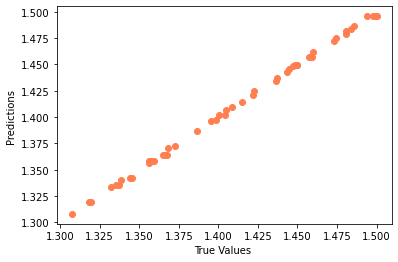

In [190]:
plt.scatter(y_test,y_pred, c='coral')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
# plt.axis('equal')
# plt.axis('square')
plt.show()

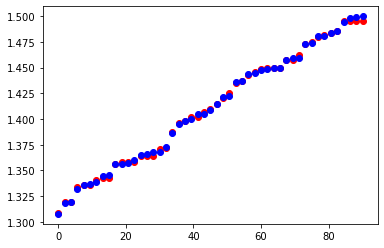

In [191]:
x = np.linspace(0,90,y_test.shape[0])
plt.scatter(x, y_pred, color ='red') # red shows predicted
plt.scatter(x, y_test, color ='blue')  #blue is actual
plt.show()
# hence perfect overlap shows good prediction